<a href="https://colab.research.google.com/github/screid/Estadistica_Computacional_UGM/blob/main/Clase_8_Variables_Aleatorias_y_Funciones_de_Probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Distribución binomial

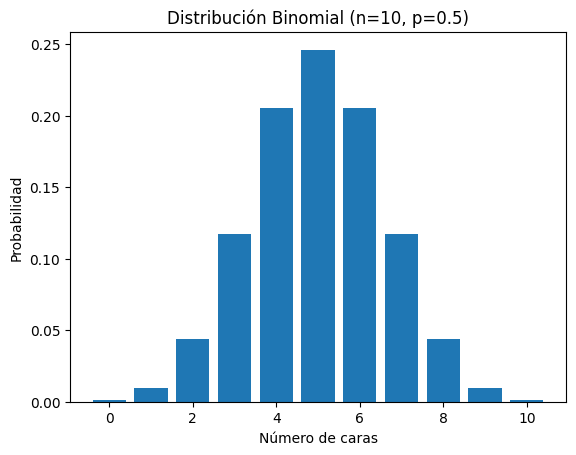

In [7]:
from scipy.stats import binom

n = 10 # número de ensayos
p = 0.50 # probabilidad de éxito

x = range(n + 1)
probabilidades = binom.pmf(x, n, p)

plt.bar(x, probabilidades)
plt.title("Distribución Binomial (n=10, p=0.5)")
plt.xlabel("Número de caras")
plt.ylabel("Probabilidad")
plt.show()

In [9]:
# ¿Cuál es la probabilidad de que, al lanzar 10 veces una monedas, tenga exactamente 4 caras?
# P(X=4)
# 2.1 Definir la distribución
n, p = 10, 0.5
dist = binom(n, p)

# 2.3 P(X = k)
p_eq = dist.pmf(4)
print(p_eq)

0.2050781249999999


In [14]:
# ¿Cuál es la probabilidad de que, al lanzar 10 veces una moneda, tenga, a lo menos, 3 caras?
k = 3
p_less = dist.cdf(k)
print(p_less)

0.171875


# 2. Distribución de Poisson

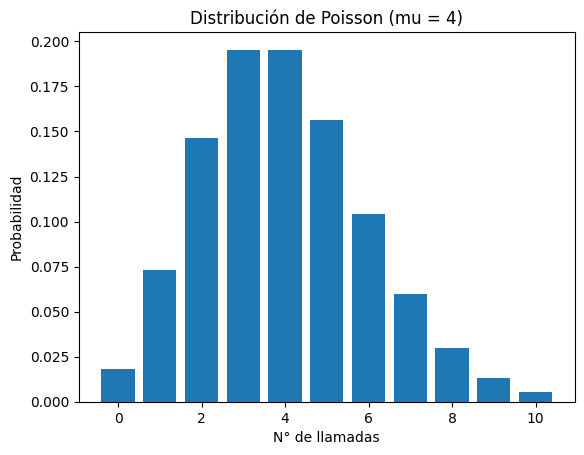

In [ ]:
from scipy.stats import poisson

mu = 4 # número promedio de eventos
x = range(0, 11)
probabilidades = poisson.pmf(x, mu)

plt.bar(x, probabilidades)
plt.title("Distribución de Poisson (mu = 4)")
plt.xlabel("N° de llamadas")
plt.ylabel("Probabilidad")
plt.show()

# 3. Distribución Normal

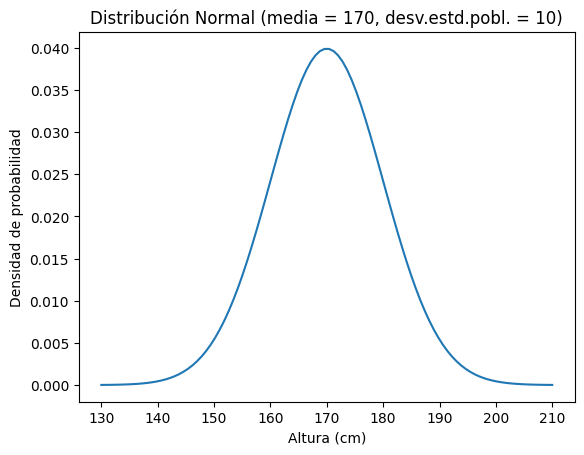

In [ ]:
from scipy.stats import norm

media = 170
desviacion = 10
x = np.linspace(130, 210, 100)
densidad = norm.pdf(x, media, desviacion)

plt.plot(x, densidad)
plt.title("Distribución Normal (media = 170, desv.estd.pobl. = 10)")
plt.xlabel("Altura (cm)")
plt.ylabel("Densidad de probabilidad")
plt.show()

# 4. Distribución exponencial

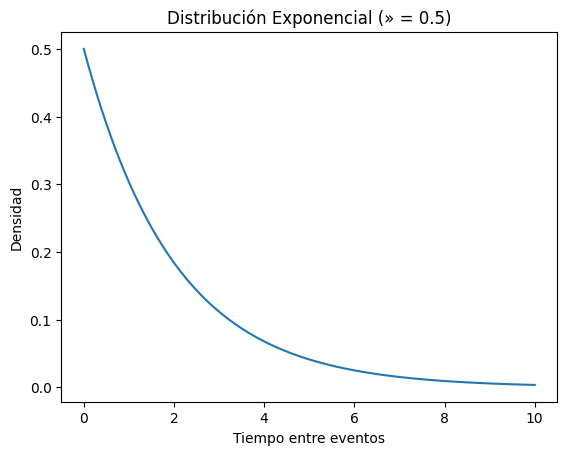

P(Tiempo < 1 min) = 0.39
P(Tiempo > 5 min) = 0.08


In [ ]:
from scipy.stats import expon

x = np.linspace(0, 10, 100)
densidad = expon.pdf(x, scale=2) # scale = 1/»

plt.plot(x, densidad)
plt.title("Distribución Exponencial (» = 0.5)")
plt.xlabel("Tiempo entre eventos")
plt.ylabel("Densidad")
plt.show()

# Probabilidad de que el bus llegue en menos de 1 minuto
prob_menor_1 = expon.cdf(1, scale=2)
print(f"P(Tiempo < 1 min) = {prob_menor_1:.2f}") # ~0.39

# Probabilidad de que el bus se demore más de 5 minutos
prob_mayor_5 = 1 - expon.cdf(5, scale=2)
print(f"P(Tiempo > 5 min) = {prob_mayor_5:.2f}") # ~0.08

# 5. Extras

En esta sección pondré ejemplos con juegos de azar, para que lo practiquen y entiendan mejor.

## 1. Distribución Binomial - ¿Cuántas veces ganaré si juego 10 manos?
Contexto: Supón que tienes un 42% de probabilidad de ganar una mano de blackjack si juegas con estrategia básica.

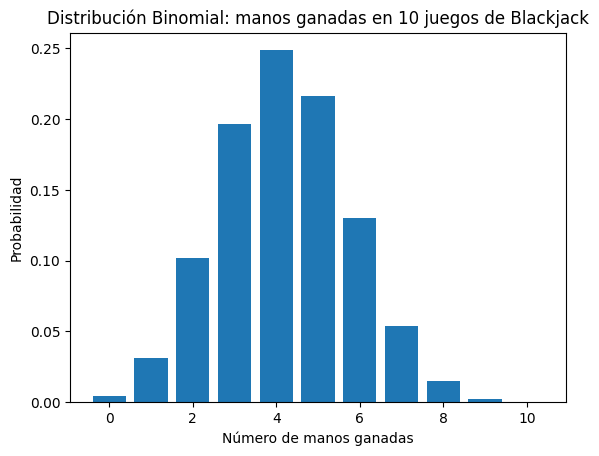

In [ ]:
n = 10  # número de manos jugadas
p = 0.42  # probabilidad de ganar una mano

x = range(n + 1)
y = binom.pmf(x, n, p)

plt.bar(x, y)
plt.title('Distribución Binomial: manos ganadas en 10 juegos de Blackjack')
plt.xlabel('Número de manos ganadas')
plt.ylabel('Probabilidad')
plt.show()


## 2. Distribución Poisson - ¿Cuántas veces esperas que el dealer se pase en 20 manos?
Contexto: Si el dealer se pasa el 17% de las veces, ¿cuántas veces ocurrirá eso en 20 manos? (estimar cuántas veces, de esas 20 manos jugadas, el dealer termina con más de 21 puntos (lo que se llama un "bust" en inglés)).

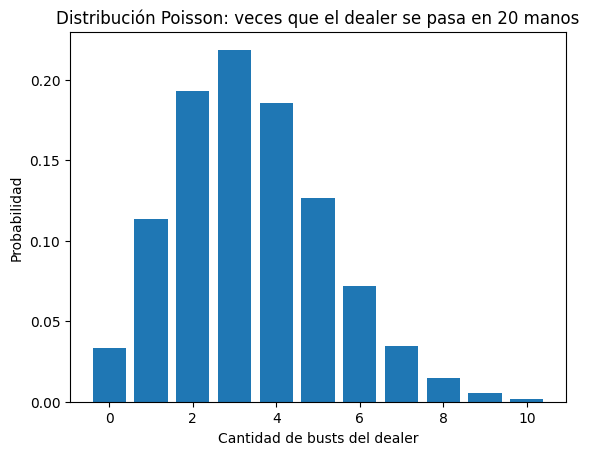

In [ ]:
tasa_promedio = 20 * 0.17  # número esperado de "busts" del dealer
x = range(0, 11)
y = poisson.pmf(x, mu=tasa_promedio)

plt.bar(x, y)
plt.title('Distribución Poisson: veces que el dealer se pasa en 20 manos')
plt.xlabel('Cantidad de busts del dealer')
plt.ylabel('Probabilidad')
plt.show()


## 3. Distribución Exponencial - Tiempo entre eventos en una ruleta o apuestas sucesivas
Contexto: En un casino, el tiempo entre apuestas exitosas (aciertos) puede modelarse como una variable aleatoria continua. Por ejemplo, en una ruleta con una probabilidad baja de éxito (como al apostar a un solo número), el tiempo entre aciertos sigue una distribución exponencial.

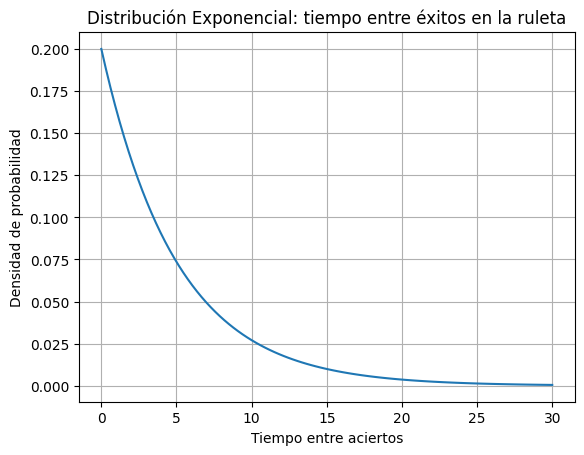

In [ ]:
lambda_inv = 5  # tiempo medio entre éxitos (por ejemplo, cada 5 jugadas)
x = np.linspace(0, 30, 100)
y = expon.pdf(x, scale=lambda_inv)

plt.plot(x, y)
plt.title('Distribución Exponencial: tiempo entre éxitos en la ruleta')
plt.xlabel('Tiempo entre aciertos')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()


El gráfico muestra una función de densidad de probabilidad que representa el tiempo esperado entre aciertos en un juego de ruleta, bajo el supuesto de que estos eventos ocurren de forma aleatoria pero con una frecuencia constante a lo largo del tiempo.

El eje horizontal representa el tiempo transcurrido entre un acierto y el siguiente (por ejemplo, número de apuestas realizadas).

El eje vertical indica la probabilidad relativa de que ese tiempo entre aciertos ocurra.

La curva decreciente refleja que es más probable que un acierto ocurra en los primeros intentos.

A medida que pasa el tiempo sin un acierto, la probabilidad de que siga ocurriendo esa espera disminuye.

Esto es característico de la distribución exponencial, muy usada para modelar tiempos entre eventos aleatorios, como fallas de equipos, llamadas telefónicas… o apuestas exitosas en juegos de azar como la ruleta.

## 4. Distribución Normal – Suma de valores de cartas en muchas manos
Contexto: Si simulas muchas manos, la suma promedio de los valores obtenidos tiende a una distribución normal (teorema central del límite).

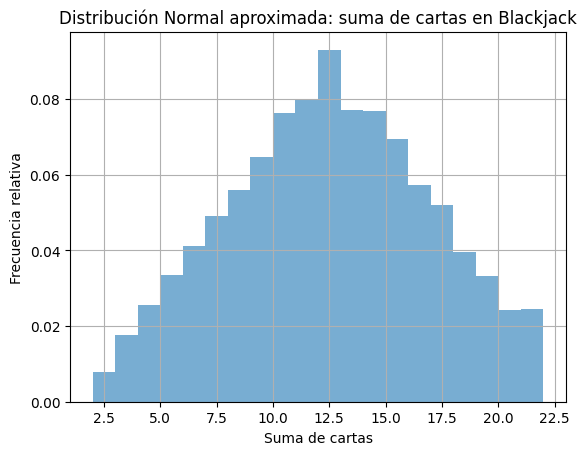

In [ ]:
# Simular 10,000 manos con 2 cartas entre 1 y 11 (simplificado)
manos = [np.random.randint(1, 12, 2).sum() for _ in range(10000)]

plt.hist(manos, bins=range(2, 23), density=True, alpha=0.6)
plt.title('Distribución Normal aproximada: suma de cartas en Blackjack')
plt.xlabel('Suma de cartas')
plt.ylabel('Frecuencia relativa')
plt.grid(True)
plt.show()

Este histograma muestra la distribución de la suma de cartas obtenidas al simular 10.000 manos de Blackjack, donde cada mano consiste en dos cartas cuyo valor se elige aleatoriamente entre 1 y 11.

El eje horizontal representa la suma total de puntos de las dos cartas.

El eje vertical indica la frecuencia relativa con la que se obtuvo cada suma en la simulación.

Se observa una forma aproximadamente simétrica y campaniforme, lo que refleja el comportamiento de una distribución normal. Esto ocurre por el Teorema Central del Límite, que establece que al sumar variables aleatorias independientes (como el valor de dos cartas), su distribución tiende a una forma normal, incluso si los valores individuales no lo son.

Este tipo de análisis es útil para entender qué valores son más comunes al inicio de una mano y cómo varía el riesgo de "pasarse" (superar 21) a medida que se piden más cartas.

# 6. Estrategias Blackjack (sustentadas estadísticamente)

En el Blackjack, la decisión de pedir otra carta ("hit") o quedarse ("stand") se basa en la probabilidad de:

* Mejorar tu mano sin pasarte de 21, y

* Que el dealer se pase o tenga una mano peor que la tuya.

A continuación, algunas reglas generales respaldadas por análisis estadísticos del juego:

📌 Casos frecuentes y su justificación:
🔸 Si tienes 12 a 16 puntos y el dealer muestra un 2 a 6:
* Conviene quedarse.

* El dealer tiene alta probabilidad de pasarse, porque está obligado a seguir pidiendo hasta tener al menos 17.

* Tus probabilidades de ganar son mayores si esperas que él falle.

🔸 Si tienes 12 a 16 puntos y el dealer muestra 7 o más:
* Conviene pedir.

* El dealer probablemente no se pasará (tiene ventaja).

* Tu única opción real de ganar es mejorar tu mano, aunque implique riesgo.

🔸 Si tienes 17 o más:
* No pidas cartas.

* La probabilidad de pasarte supera el 70% (por ejemplo, con 17, cualquier carta mayor a 4 te hace perder).

* Estadísticamente es mejor quedarse y esperar que el dealer se pase.

🔸 Si tienes 11 o menos:
* Siempre conviene pedir.

* No puedes pasarte, y tienes buenas chances de mejorar tu mano significativamente.

# 7. Regalo
Como regalo, les dejo un simulador simple de Blackjack. No modifiquen las funciónes, sólo ejecuten la última celda

In [ ]:
import random

# Función para obtener el valor de una carta (simplificado: 2 a 11, donde 11 es As)
def sacar_carta():
    return random.choice([2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 11])  # 10 representa 10, J, Q, K

# Estrategia básica simplificada para el jugador
def estrategia_basica(jugador, carta_visible_dealer):
    while jugador < 12:
        jugador += sacar_carta()
    if 12 <= jugador <= 16:
        if carta_visible_dealer >= 7:
            jugador += sacar_carta()
    return jugador

# Dealer: sigue hasta 17 o más
def juega_dealer():
    total = sacar_carta() + sacar_carta()
    while total < 17:
        total += sacar_carta()
    return total

# Simulación
def simular_blackjack(n=10000):
    ganadas, perdidas, empates = 0, 0, 0

    for _ in range(n):
        carta_dealer_visible = sacar_carta()
        dealer_total = juega_dealer()

        jugador_total = sacar_carta() + sacar_carta()
        jugador_total = estrategia_basica(jugador_total, carta_dealer_visible)

        if jugador_total > 21:
            perdidas += 1
        elif dealer_total > 21 or jugador_total > dealer_total:
            ganadas += 1
        elif jugador_total == dealer_total:
            empates += 1
        else:
            perdidas += 1

    print(f"Resultados tras {n} manos con estrategia básica:")
    print(f"Ganadas: {ganadas/n:.2%}")
    print(f"Perdidas: {perdidas/n:.2%}")
    print(f"Empates: {empates/n:.2%}")

In [ ]:
# Sólo ejecuten esta línea de codigo!!
simular_blackjack()

Resultados tras 10000 manos con estrategia básica:
Ganadas: 41.89%
Perdidas: 50.38%
Empates: 7.73%
